## FIFA2018 - Player's Personal Data
Data Source: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

In [1]:
import pyforest

In [2]:
pd.set_option('display.max_columns', 0,
             'display.max_colwidth', 0)

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/FIFA2018/PlayerPersonalData.csv')
df.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/players/10/16/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/players/10/16/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/players/10/16/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/players/10/16/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/players/10/16/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [4]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Photo', 'Flag', 'Club Logo'], inplace=True)

In [5]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [6]:
# df.to_csv('fifa2018player.csv', index=False)

In [7]:
df.rename(columns={"Value": "Value_EUR", "Wage": "Wage_EUR"}, inplace=True)

In [8]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [9]:
df['Value_EUR'].str[-1:]

0        M
1        M
2        M
3        M
4        M
        ..
17976    K
17977    0
17978    K
17979    K
17980    K
Name: Value_EUR, Length: 17981, dtype: object

In [10]:
df['Value_EUR'].str[-1:].unique()

array(['M', '0', 'K'], dtype=object)

In [11]:
def value_unit(s: str):
    s = s.strip().upper()
    if s[-1] == 'M':
        return 1e6
    elif s[-1] == 'K':
        return 1000
    else:
        return 1

In [27]:
value_unit('€50.5M')

1000000.0

In [13]:
import re
def str_value(s: str):
    mul = value_unit(s)
    return float(re.sub(r'[^0-9.]', '', s)) * mul

In [14]:
str_value('€50.2M')

50200000.0

In [15]:
df[['Value_EUR', 'Wage_EUR']][:10]

,Value_EUR,Wage_EUR
0,€95.5M,€565K
1,€105M,€565K
2,€123M,€280K
3,€97M,€510K
4,€61M,€230K
5,€92M,€355K
6,€64.5M,€215K
7,€90.5M,€295K
8,€79M,€340K
9,€77M,€275K


In [16]:
df[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s))[:10]

,Value_EUR,Wage_EUR
0,95500000.0,565000.0
1,105000000.0,565000.0
2,123000000.0,280000.0
3,97000000.0,510000.0
4,61000000.0,230000.0
5,92000000.0,355000.0
6,64500000.0,215000.0
7,90500000.0,295000.0
8,79000000.0,340000.0
9,77000000.0,275000.0


In [17]:
df[['Value_EUR', 'Wage_EUR']] = df[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s))
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           17981 non-null  int64  
 1   Name         17981 non-null  object 
 2   Age          17981 non-null  int64  
 3   Nationality  17981 non-null  object 
 4   Overall      17981 non-null  int64  
 5   Potential    17981 non-null  int64  
 6   Club         17733 non-null  object 
 7   Value_EUR    17981 non-null  float64
 8   Wage_EUR     17981 non-null  float64
 9   Special      17981 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.4+ MB


In [19]:
# df.to_csv('fifa2018_player_personal_data.csv', index=False)

In [20]:
df.sort_values("Value_EUR", ascending=False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
5,188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,2143
7,183277,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,2096
11,192985,K. De Bruyne,26,Belgium,89,92,Manchester City,83000000.0,285000.0,2162
8,182521,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,2165
19,211110,P. Dybala,23,Argentina,88,93,Juventus,79000000.0,215000.0,2063
9,167664,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,1961


In [21]:
df.nlargest(10, 'Value_EUR')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
5,188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,2143
7,183277,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,2096
11,192985,K. De Bruyne,26,Belgium,89,92,Manchester City,83000000.0,285000.0,2162
8,182521,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,2165
19,211110,P. Dybala,23,Argentina,88,93,Juventus,79000000.0,215000.0,2063
9,167664,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,1961


In [23]:
df.groupby('Club').sum()[['Value_EUR', 'Wage_EUR']].sort_values('Value_EUR', ascending=False).head(10)

,Value_EUR,Wage_EUR
Club,,
Real Madrid CF,826700000.0,4751000.0
FC Bayern Munich,748825000.0,3273000.0
FC Barcelona,744500000.0,4792000.0
Chelsea,673085000.0,3537000.0
Paris Saint-Germain,631750000.0,2198000.0
Manchester United,625300000.0,3653000.0
Juventus,617100000.0,3165000.0
Manchester City,578215000.0,3152000.0
Atlético Madrid,566150000.0,1581000.0


<IPython.core.display.Javascript object>

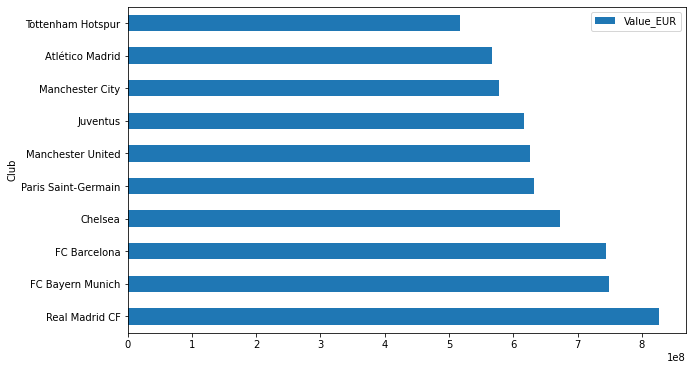

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
df.groupby('Club').sum()[['Value_EUR']].sort_values('Value_EUR', ascending=False).head(10).plot(kind='barh', ax=ax);